## Simple classifier settings:
* Address Size: 15
* Threshold strategy: Global Threshold = 115
* Number of nodes: 1

Importing libs:

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

import wisardpkg as wp

from load_cifar10 import load_cifar_10_data
from tools import evaluation, flatten, print_images

Importing dataset:

In [21]:
cifar_10_dir = 'cifar-10-batches-py'

train_data, train_labels, test_data, test_labels, label_names = load_cifar_10_data(cifar_10_dir)

Converting labels from int to string:

In [22]:
train_labels = [str(label) for label in train_labels]
test_labels = [str(label) for label in test_labels]

Testing printImages function:

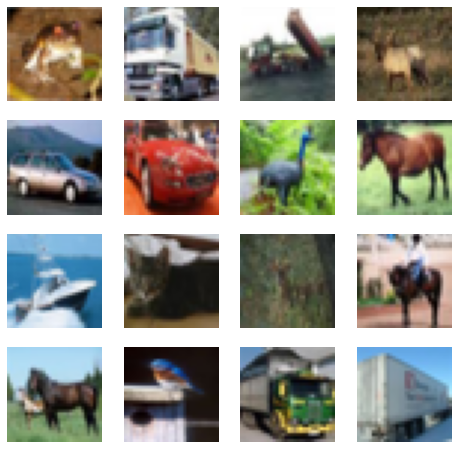

In [23]:
print_images(train_data[0:16])

Global threshold (= 115) use example:

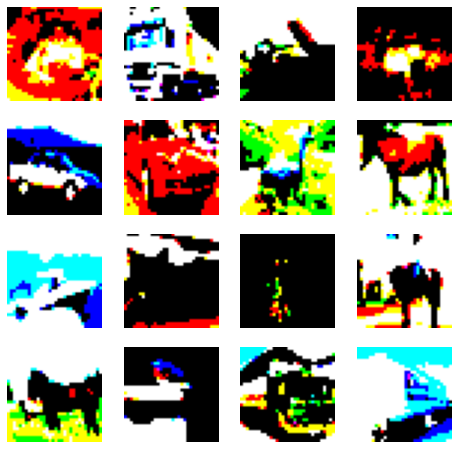

In [24]:
threshold = 115
X_train = np.where(np.array(train_data[0:16]) > threshold, 255, 0)
print_images(X_train)

Applying global threshold:

In [25]:
threshold = 115
X_train = np.where(np.array(train_data) > threshold, 1, 0)
X_test = np.where(np.array(test_data) > threshold, 1, 0)

Linearizing samples:

In [26]:
X_train = [flatten(sample) for sample in X_train]
X_test = [flatten(sample) for sample in X_test]

In [27]:
addressSize = 15
ignoreZero = False

model = wp.Wisard(addressSize, ignoreZero=ignoreZero, verbose=True)

model.train(X_train, train_labels)

out = model.classify(X_test)

# ----------------------------------------------------------------------------------------------------------------------
# Evaluation
evaluation(out, test_labels)

Acc: 0.4027
